In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
url_input = input('Enter URL match')
url_input

'https://www.fotmob.com/es/matches/wolves-vs-west-ham/2gnhk2#4506442'

In [3]:
# check URL
url_input

'https://www.fotmob.com/es/matches/wolves-vs-west-ham/2gnhk2#4506442'

In [4]:
# FotMob

url = url_input

r = requests.get(url)

soup = bs(r.content)

soup.find('script', attrs={'id': '__NEXT_DATA__'})

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

General info

In [5]:
# ball possesion
local_ball_possesion = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][0]['stats'][0]
away_ball_possesion = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][0]['stats'][1]
local_ball_possesion, away_ball_possesion

(54, 46)

In [6]:
# xG
local_xG = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][1]['stats'][0]
away_xG = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][1]['stats'][1]
local_xG, away_xG

('1.01', '1.63')

In [7]:
# total shots
local_total_shots = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][2]['stats'][0]
away_total_shots = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][2]['stats'][1]
local_total_shots, away_total_shots

(19, 19)

In [8]:
# shots on target
local_shots_target = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][3]['stats'][0]
away_shots_target = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][3]['stats'][1]
local_shots_target, away_shots_target

(4, 5)

Shots

In [9]:
df_shots = pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])
df_shots.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,keeperId,firstName,lastName,fullName,teamColor,shortName
0,2757590829,AttemptSaved,8654,719219,Konstantinos Mavropanos,91.000000,27.950714,8,NaN,True,...,False,"{'x': 0.9596560846560838, 'y': 0.3227513211640...",False,True,NaN,Konstantinos,Mavropanos,Konstantinos Mavropanos,#7B2B3A,NaN
1,2757594533,AttemptSaved,8654,865931,Max Kilman,102.534483,27.614524,16,NaN,True,...,False,"{'x': 1.3832671957671967, 'y': 0.3227513211640...",False,True,NaN,Max,Kilman,Max Kilman,#7B2B3A,NaN
2,2757594843,Miss,8602,421786,Mario Lemina,76.065534,36.440000,17,NaN,False,...,False,"{'x': 2, 'y': 0.5781603182037276, 'zoomRatio':...",False,False,NaN,Mario,Lemina,Mario Lemina,#eb9504,NaN
3,2757596729,AttemptSaved,8602,1174672,Joao Gomes,85.601471,26.343125,21,NaN,False,...,False,"{'x': 1.3227513227513243, 'y': 0.2802840420634...",False,False,30973.0,Joao,Gomes,Joao Gomes,#eb9504,NaN
4,2757598161,AttemptSaved,8654,523825,Jarrod Bowen,95.929825,25.533750,23,NaN,False,...,False,"{'x': 1.282407407407408, 'y': 0.03227513211640...",False,True,280287.0,Jarrod,Bowen,Jarrod Bowen,#7B2B3A,NaN


In [10]:
df_shots.shape

(38, 30)

In [11]:
# check if True in isOwnGoal
df_shots[['eventType', 'expectedGoals', 'situation', 'isOwnGoal']]

,eventType,expectedGoals,situation,isOwnGoal
0,AttemptSaved,0.053997,SetPiece,False
1,AttemptSaved,0.107912,FromCorner,False
2,Miss,0.017402,RegularPlay,False
3,AttemptSaved,0.059019,RegularPlay,False
4,AttemptSaved,0.139348,RegularPlay,False
5,AttemptSaved,0.039616,RegularPlay,False
6,AttemptSaved,0.016212,RegularPlay,False
7,AttemptSaved,0.173573,RegularPlay,False
8,AttemptSaved,0.009642,FromCorner,False
9,Miss,0.009282,SetPiece,False


In [12]:
# check if exists NaN in expectedGoals

has_nan = df_shots['expectedGoals'].isna().any()
print(has_nan)  # Returns True if there are NaN values, False otherwise

# nan_count = df_shots['expectedGoals'].isna().sum()
# print(nan_count)  # Returns the number of NaN values in the column

# no_nan = df_shots['expectedGoals'].notna().all()
# print(no_nan)  # Returns True if no NaN values are present

# df_shots.info()

False


In [13]:
df_shots[['eventType', 'expectedGoals', 'isOwnGoal']]

,eventType,expectedGoals,isOwnGoal
0,AttemptSaved,0.053997,False
1,AttemptSaved,0.107912,False
2,Miss,0.017402,False
3,AttemptSaved,0.059019,False
4,AttemptSaved,0.139348,False
5,AttemptSaved,0.039616,False
6,AttemptSaved,0.016212,False
7,AttemptSaved,0.173573,False
8,AttemptSaved,0.009642,False
9,Miss,0.009282,False


In [15]:
# If you want to convert it to a LIST add .tolist()

# xG = df_shots['expectedGoals']
# xG_list = xG.tolist()
# xG_list

# xG=df_shots.expectedGoals
# xG

# xG_loc = df_shots.loc[:, 'expectedGoals']
# xG_loc

xG_get = df_shots.get('expectedGoals')
xG_get

# Using .iloc[]: If you know the position of the name column (e.g., if it's the first column):
# column_position = df_shots.columns.get_loc('expectedGoals')

# column_position
# xG_iloc = df_shots.iloc[:, 15]
# xG_iloc

0     0.025060
1     0.280919
2     0.012404
3     0.035189
4     0.044398
5     0.024387
6     0.026799
7     0.019334
8     0.019305
9     0.030529
10    0.076437
11    0.728462
12    0.183337
13    0.024634
14    0.039294
15    0.590754
16    0.101465
17    0.026288
18    0.031369
19    0.022127
20    0.394210
21    0.027967
22    0.590799
23    0.030135
24    0.740838
25    0.021303
26    0.120905
27    0.029907
Name: expectedGoals, dtype: float64

In [ ]:
# Replace NaN with 0

# df_shots['expectedGoals'].fillna(0, inplace=True)

# Replace with the mean of the column:
# df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].mean(), inplace=True)

# Replace with the median of the column:
df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


In [14]:
# get local team id

local_team_id = json_fotmob['props']['pageProps']['general']['homeTeam']['id']
local_team_id

8654

In [12]:
# get general data

json_fotmob['props']['pageProps']['general']

{'matchId': '4506416',
 'matchName': 'Liverpool-vs-Manchester City_Sun, Dec 1, 2024, 16:00 UTC',
 'matchRound': '13',
 'teamColors': {'darkMode': {'home': '#911712', 'away': '#76b4e5'},
  'lightMode': {'home': '#911712', 'away': '#69A8D8'},
  'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(29, 29, 29, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'}},
 'leagueId': 47,
 'leagueName': 'Premier League',
 'leagueRoundName': 'Round 13',
 'parentLeagueId': 47,
 'countryCode': 'ENG',
 'parentLeagueName': 'Premier League',
 'parentLeagueSeason': '2024/2025',
 'parentLeagueTopScorerLink': 'https://data.fotmob.com/stats/47/season/23685/goals.json',
 'parentLeagueTournamentId': 23685,
 'homeTeam': {'name': 'Liverpool', 'id': 8650},
 'awayTeam': {'name': 'Manchester City', 'id': 8456},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Sun, Dec 1, 2024, 16:00 UTC',
 'matchTimeUTCDate': '2024-12-01T16:00:00.000Z',
 'started': True,


In [15]:
# get league name and league round for the viz

leagueName = json_fotmob['props']['pageProps']['general']['leagueName']
print(leagueName)
leagueRound = json_fotmob['props']['pageProps']['general']['leagueRoundName']
print(leagueRound)

Premier League
Round 15


In [16]:
league_title = leagueName + ' | ' + leagueRound
league_title

'Premier League | Round 15'

In [17]:
# local team info and away team info

json_fotmob['props']['pageProps']['header']['teams']

[{'name': 'West Ham United',
  'id': 8654,
  'score': 2,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8654_small.png',
  'pageUrl': '/teams/8654/overview/west-ham-united',
  'fifaRank': None},
 {'name': 'Wolverhampton Wanderers',
  'id': 8602,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8602_small.png',
  'pageUrl': '/teams/8602/overview/wolverhampton-wanderers',
  'fifaRank': None}]

In [18]:
# Get ID and team names

local_team_name = json_fotmob['props']['pageProps']['header']['teams'][0]['name']
print(local_team_name)
away_team_name = json_fotmob['props']['pageProps']['header']['teams'][1]['name']
print(away_team_name)

West Ham United
Wolverhampton Wanderers


In [19]:
# score

local_team_score = json_fotmob['props']['pageProps']['header']['teams'][0]['score']
print(local_team_score)
away_team_score = json_fotmob['props']['pageProps']['header']['teams'][1]['score']
print(away_team_score)

2
1


In [20]:
# title for the viz

plot_title = local_team_name + ' ' + str(local_team_score) + '-' + str(away_team_score) + ' ' + away_team_name
plot_title

'West Ham United 2-1 Wolverhampton Wanderers'

In [21]:
# Get color teams

json_fotmob['props']['pageProps']['general']['teamColors']

{'darkMode': {'home': '#8B3249', 'away': '#F8A01A'},
 'lightMode': {'home': '#7B2B3A', 'away': '#eb9504'},
 'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(29, 29, 29, 1.0)'},
 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'}}

In [22]:
# local and away team names for the viz

shots_local_name = local_team_name + ' ' + 'shots'
shots_local_name = shots_local_name.upper()
print(shots_local_name)

shots_away_name = away_team_name + ' ' + 'shots'
shots_away_name = shots_away_name.upper()
print(shots_away_name)

WEST HAM UNITED SHOTS
WOLVERHAMPTON WANDERERS SHOTS


In [26]:
# check type isOwnGoal | looks like a boolean

type('isOwnGoal')

str

In [40]:
df_shots.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'keeperId',
       'firstName', 'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [21]:
# keeperId

df_shots[['keeperId', 'eventType']]

,keeperId,eventType
0,276729.0,AttemptSaved
1,NaN,AttemptSaved
2,276729.0,AttemptSaved
3,276729.0,AttemptSaved
4,276729.0,Goal
5,NaN,Miss
6,NaN,Miss
7,NaN,AttemptSaved
8,NaN,Post
9,NaN,Miss


In [29]:
type('isOwnGoal')

str

In [23]:
# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = '/home/axel/Code/Python/axel/files/fonts/Arvo/Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [24]:
home_color = json_fotmob['props']['pageProps']['general']['teamColors']['darkMode']['home']
away_color = json_fotmob['props']['pageProps']['general']['teamColors']['darkMode']['away']

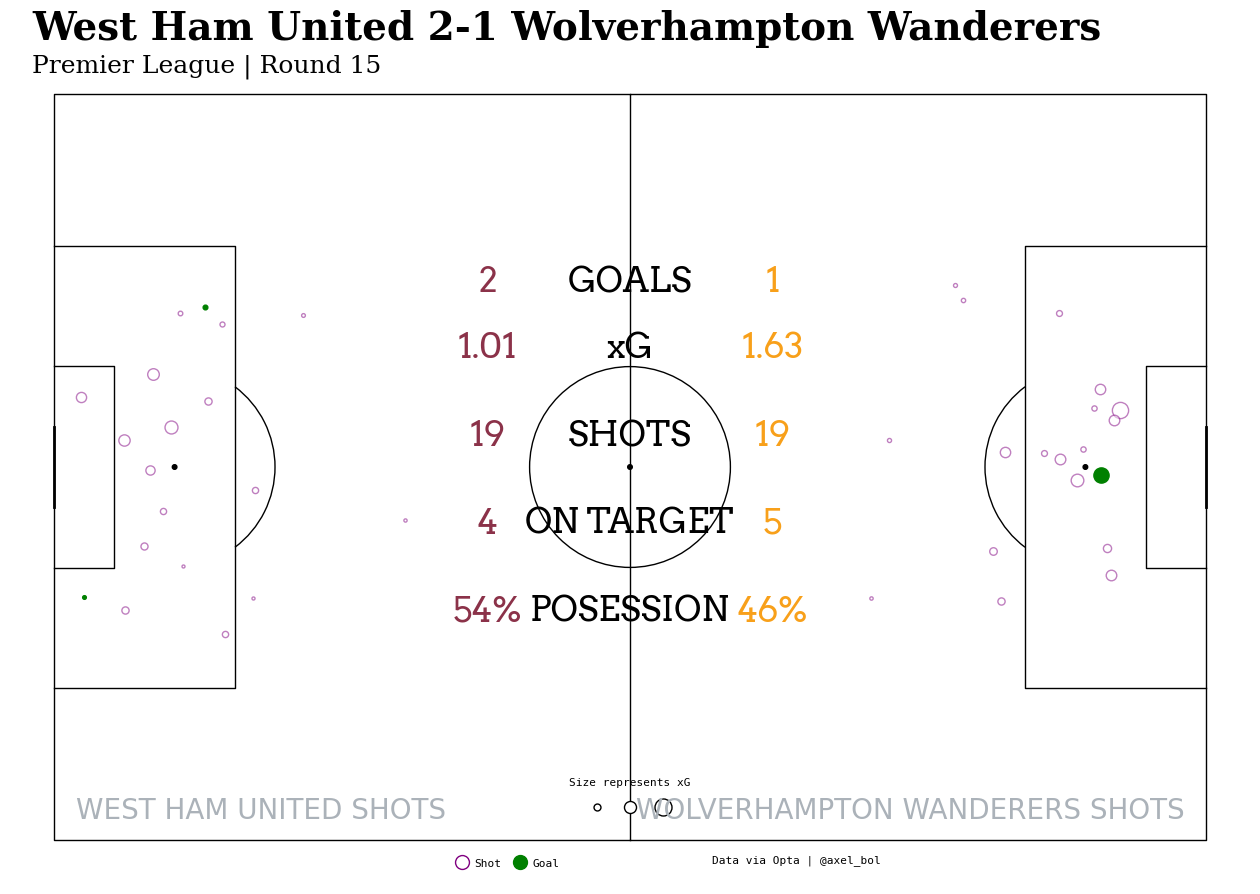

In [25]:
# add facecolor='red' if you want the color red around the pitch
fig, ax = plt.subplots(figsize=(16, 12))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', linewidth=1, pitch_color='white', label=False)
pitch.draw(ax=ax)

# plot the shots
# We want the size of the shot to be 500 * the expected goals value
# We also want to leave the marker empty if the shot was missed and fill it if it was a goal
for x in df_shots.to_dict(orient='records'):
    if x['teamId'] == local_team_id:
        # We want to plot the local team on left side of the pitch
        # So we need to mirror both the x and y coordinates
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        ),
        m_marker = (
            '*' if x['situation'] == 'Penalty' and x['eventType'] == 'Goal'
            else 'o'
        )
        pitch.scatter(
            x=105-x['x'],
            y=68-x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            marker=m_marker,
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )
    # right side
    else:
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        ),
        m_marker = (
            '*' if x['situation'] == 'Penalty' and x['eventType'] == 'Goal'
            else 'o'
        )
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            marker=m_marker,
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1,
        )

# fig.suptitle('The Strongest - Bolivar',  fontsize=15, fontweight=600)
# plt.title('Title', x=0.1, y=1)
# ax.set_title('División Profesional', x=0.1, y=0.95, fontsize=10, fontweight=600, color='black', loc='left')

# We can also add a title directly above the text we added
ax.text(-2, 73, plot_title, ha='left', fontsize=28, fontfamily='serif', fontweight=600, color='black')
ax.text(-2, 70, league_title, ha='left', fontsize=18, fontfamily='serif', fontweight=100)

# We can add a title above the different halves of the pitch
ax.text(2, 2, shots_local_name, ha='left', fontsize=20, fontweight=500, color='#abb2b9')
ax.text(103, 2, shots_away_name, ha='right', fontsize=20, fontweight=500, color='#abb2b9')

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)

# We can add a label for the legend
ax.text(52.5, 5, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')

# Legend
if 'True' in str(df_shots['isOwnGoal'].values):
    pitch.scatter(29.3, -2, s=500*.2, ec='red', c='red', ax=ax)
    ax.text(33, -2.4, 'Own Goal', ha='center', fontsize=8, fontfamily='monospace')

pitch.scatter(37.2, -2, s=500*.2, ec='purple', c='white', ax=ax)
ax.text(39.5, -2.4, 'Shot', ha='center', fontsize=8, fontfamily='monospace')

pitch.scatter(42.5, -2, s=500*.2, ec='green', c='green', ax=ax)
ax.text(44.8, -2.4, 'Goal', ha='center', fontsize=8, fontfamily='monospace')

if 'Penalty' in df_shots['situation'].values and 'Goal' in df_shots['eventType'].values:
    pitch.scatter(47.4, -2, s=500*.2, ec='green', c='green', marker='*', ax=ax)
    ax.text(50.5, -2.4, 'Penalty', ha='center', fontsize=8, fontfamily='monospace')
# info
ax.text(60, -2, 'Data via Opta | @axel_bol', ha='left', fontsize=8, fontfamily='monospace')

# match context
# pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
# pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
# pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)

ax.text(x=52.5, y=50, s='GOALS', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=50, s=local_team_score, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=50, s=away_team_score, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=44, s='xG', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=44, s=local_xG, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=44, s=away_xG, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=36, s='SHOTS', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=36, s=local_total_shots, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=36, s=away_total_shots, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=28, s='ON TARGET', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=28, s=local_shots_target, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=28, s=away_shots_target, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=20, s='POSESSION', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=20, s=f"{local_ball_possesion}%", ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=20, s=f"{away_ball_possesion}%", ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

# CHANGE THIS TO YOUR PATH
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)

plt.show()